In [1]:
import pandas as pd
import pathlib
import seaborn as sns

sns.set(style="whitegrid")

In [9]:
tabs = []

for file in pathlib.Path("outcomes/t16/").iterdir():
    single_tab_data = pd.read_csv(file)
    single_tab_data["Outcome"] = single_tab_data["Outcome"].astype("category")
    single_tab_data = single_tab_data.set_index("Outcome").sort_index()

    tabs.append(single_tab_data)

t16_maps = tabs[0]

for single_tab_data in tabs[1:]:
    t16_maps = t16_maps.merge(single_tab_data, how="inner", left_index=True, right_index=True)
    t16_maps["Count"] = t16_maps["Count_x"] + t16_maps["Count_y"]
    t16_maps = t16_maps.drop(["Count_x", "Count_y"], axis=1)

t16_maps = t16_maps.reindex(pd.CategoricalIndex(["No effect", "Rerolled mods", "8 affixes", "Vaal implicit", "Vaal temple map"]))
print(t16_maps.to_markdown(tablefmt="github"))

|                 |   Count |
|-----------------|---------|
| No effect       |     426 |
| Rerolled mods   |     425 |
| 8 affixes       |     415 |
| Vaal implicit   |     415 |
| Vaal temple map |      47 |


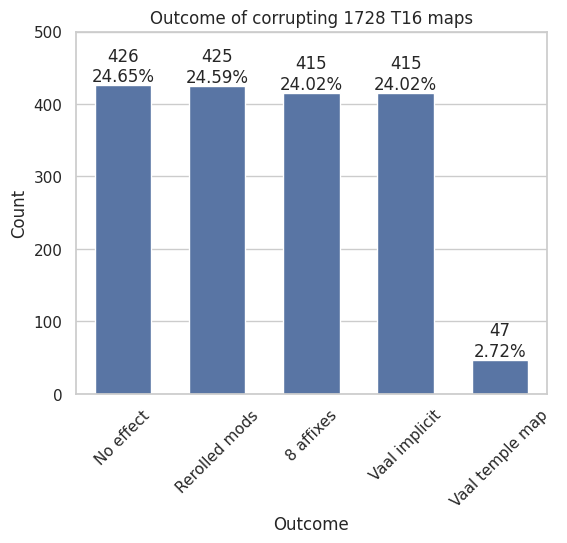

In [13]:
catp = sns.catplot(t16_maps, kind="bar", x=t16_maps.index, y="Count", height=4.5, aspect=1.25, width=0.6, order=t16_maps.index)
total_maps = t16_maps["Count"].sum()

catp.despine(right=False, top=False)
catp.ax.set_title(f"Outcome of corrupting {total_maps} T16 maps")
catp.ax.set_ylim(0, 500)
catp.ax.set_xlabel("Outcome")

for t in catp.ax.get_xticklabels():
    t.set_rotation(45)

spots = zip(catp.ax.patches, t16_maps.index)

for spot in spots:
    category_count = t16_maps[t16_maps.index == spot[1]]["Count"].values[0]
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x() + 0.3, height + 5, '{}\n{:1.2%}'.format(category_count, category_count / total_maps), ha="center")

catp.savefig("t16.png")

In [14]:
tabs = []

for file in pathlib.Path("outcomes/lowtier/").iterdir():
    single_tab_data = pd.read_csv(file)
    single_tab_data["Outcome"] = single_tab_data["Outcome"].astype("category")
    single_tab_data = single_tab_data.set_index("Outcome").sort_index()

    tabs.append(single_tab_data)

lowtier_maps = tabs[0]

for single_tab_data in tabs[1:]:
    lowtier_maps = lowtier_maps.merge(single_tab_data, how="inner", left_index=True, right_index=True)
    lowtier_maps["Count"] = lowtier_maps["Count_x"] + lowtier_maps["Count_y"]
    lowtier_maps = lowtier_maps.drop(["Count_x", "Count_y"], axis=1)

lowtier_maps = lowtier_maps.reindex(pd.CategoricalIndex(["No effect", "Rerolled mods", "8 affixes", "Vaal implicit", "Tier change"]))
print(lowtier_maps.to_markdown(tablefmt="github"))

|               |   Count |
|---------------|---------|
| No effect     |     318 |
| Rerolled mods |     171 |
| 8 affixes     |     305 |
| Vaal implicit |     333 |
| Tier change   |     169 |


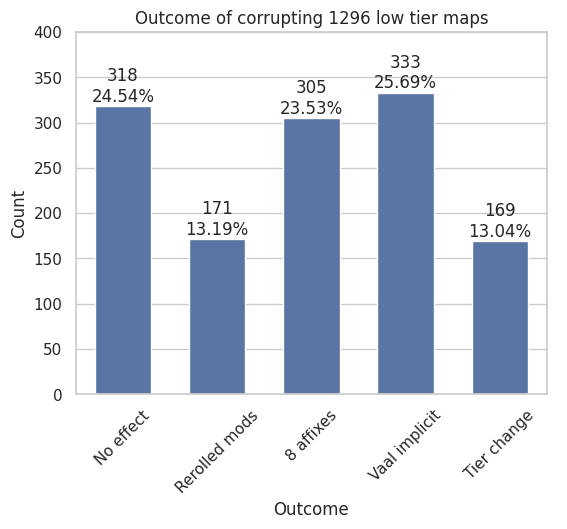

In [15]:
catp = sns.catplot(lowtier_maps, kind="bar", x=lowtier_maps.index, y="Count", height=4.5, aspect=1.25, width=0.6, order=lowtier_maps.index)
total_maps = lowtier_maps["Count"].sum()

catp.despine(right=False, top=False)
catp.ax.set_title(f"Outcome of corrupting {total_maps} low tier maps")
catp.ax.set_ylim(0, 400)
catp.ax.set_xlabel("Outcome")

for t in catp.ax.get_xticklabels():
    t.set_rotation(45)

spots = zip(catp.ax.patches, lowtier_maps.index)

for spot in spots:
    category_count = lowtier_maps[lowtier_maps.index == spot[1]]["Count"].values[0]
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x() + 0.3, height + 5, '{}\n{:1.2%}'.format(category_count, category_count / total_maps), ha="center")

catp.savefig("lowtier.png")

In [22]:
tabs = []

for file in pathlib.Path("outcomes/blight/").iterdir():
    single_tab_data = pd.read_csv(file)
    single_tab_data["Outcome"] = single_tab_data["Outcome"].astype("category")
    single_tab_data = single_tab_data.set_index("Outcome").sort_index()

    tabs.append(single_tab_data)

blight_maps = tabs[0]

for single_tab_data in tabs[1:]:
    blight_maps = blight_maps.merge(single_tab_data, how="inner", left_index=True, right_index=True)
    blight_maps["Count"] = blight_maps["Count_x"] + blight_maps["Count_y"]
    blight_maps = blight_maps.drop(["Count_x", "Count_y"], axis=1)

blight_maps = blight_maps.reindex(pd.CategoricalIndex(["No effect", "Rerolled mods", "8 affixes", "Vaal implicit", "Tier change"]))
print(blight_maps.to_markdown(tablefmt="github"))

|               |   Count |
|---------------|---------|
| No effect     |     234 |
| Rerolled mods |     133 |
| 8 affixes     |     261 |
| Vaal implicit |     250 |
| Tier change   |     122 |


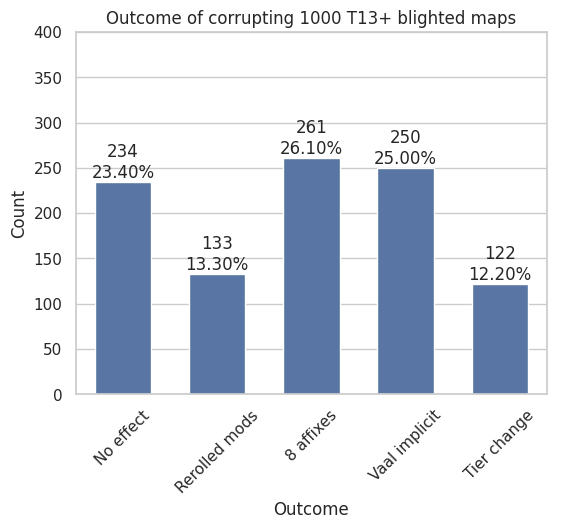

In [23]:
catp = sns.catplot(blight_maps, kind="bar", x=blight_maps.index, y="Count", height=4.5, aspect=1.25, width=0.6, order=blight_maps.index)
total_maps = blight_maps["Count"].sum()

catp.despine(right=False, top=False)
catp.ax.set_title(f"Outcome of corrupting {total_maps} T13+ blighted maps")
catp.ax.set_ylim(0, 400)
catp.ax.set_xlabel("Outcome")

for t in catp.ax.get_xticklabels():
    t.set_rotation(45)

spots = zip(catp.ax.patches, blight_maps.index)

for spot in spots:
    category_count = blight_maps[blight_maps.index == spot[1]]["Count"].values[0]
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x() + 0.3, height + 5, '{}\n{:1.2%}'.format(category_count, category_count / total_maps), ha="center")

catp.savefig("blight.png")